In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# data path
dir = 'NFLX_DS_11_23'
file_name = 'NFLX_DS_data_11_23.xlsx'
file_path = os.path.join(dir,file_name)

# load datasets
df_NFLXTop10 = pd.read_excel(file_path,sheet_name='NFLX Top 10')
df_IMDbRat = pd.read_excel(file_path,sheet_name='IMDb Rating')
df_Runtime = pd.read_excel(file_path,sheet_name='Runtime')

In [73]:
# Question 1

# Extract needed data
TVEng = df_NFLXTop10[df_NFLXTop10['category']=='TV (English)']
# Group By show title, count frequency and calculate mean value
res1 = TVEng.groupby('show_title').agg({'show_title': 'count', 'weekly_hours_viewed': 'mean'})

res1.columns=['appearances','avg_weekly_hours_viewed']
res1 = res1.sort_values(by='appearances', ascending=False)
res1_1 = res1.index[0]
res1_2 = res1['avg_weekly_hours_viewed'].iloc[0]
print(f"""TV show (Engnlish) with the most appearances in the top 10 list is : {res1_1}.\n 
The average weekly viewed hour is {res1_2:.2f} hours.""")
res1.head(5)


TV show (Engnlish) with the most appearances in the top 10 list is : You.
 
The average weekly viewed hour is 43193333.33 hours.


,appearances,avg_weekly_hours_viewed
show_title,,
You,18,4.319333e+07
Manifest,15,2.055800e+07
Ozark,14,3.133857e+07
Maid,13,5.042385e+07
The Witcher,12,6.112500e+07


In [71]:
# Question 2
# Extract needed data
FilmNonEng = df_NFLXTop10[df_NFLXTop10['category']=='Films (Non-English)']
# Join dataset on title
RatingFilmNonEng = pd.merge(FilmNonEng, df_IMDbRat, left_on='show_title', right_on='title', how='left')
# Filter valid rating
RatingFilmNonEng = RatingFilmNonEng[(RatingFilmNonEng['rating'] >= 1) & (RatingFilmNonEng['rating'] <= 10)]
# Sort by rating and drop duplicates
res2 = RatingFilmNonEng.sort_values(by='rating', ascending=True)[['show_title','rating']].drop_duplicates()

res2_1 = res2['show_title'].iloc[0]
res2_2 = FilmNonEng[FilmNonEng['show_title'] == res2_1]['weekly_hours_viewed'].mean()

print(f"""Films (non-Engnlish) with the lowest rating is : {res2_1}.\n 
The average weekly viewed hour is {res2_2:.2f} hours.""")

res2.head(5)

Films (non-Engnlish) with the lowest rating is : Nobody Sleeps in the Woods Tonight 2.
 
The average weekly viewed hour is 4610000.00 hours.


,show_title,rating
372,Nobody Sleeps in the Woods Tonight 2,3.9
148,Don't Kill Me,4.1
258,Into the Wind,4.2
184,Deep,4.2
259,Prey,4.2


In [89]:
# Question 3
FilmEng = df_NFLXTop10[df_NFLXTop10['category']=='Films (English)']
FilmEng = FilmEng.sort_values(by='cumulative_weeks_in_top_10', ascending=False)

FilmEng_Rtime = pd.merge(FilmEng,df_Runtime,left_on='show_title',right_on='title')
res3_1 = FilmEng_Rtime['show_title'].iloc[0]
print(f""" "Films(English)" with the most cumulative weeks is {res3_1}.""")
res3_2 = FilmEng_Rtime[FilmEng_Rtime['show_title']==res3_1]['weekly_hours_viewed'].sum()
# res1 = TVEng.groupby('show_title').agg({'show_title': 'count', 'weekly_hours_viewed': 'mean'})

# We could estimate by using the sum of weekly_hours_viewed

 "Films(English)" with the most cumulative weeks is Red Notice.


In [102]:
# Question 3
# Extract needed data
FilmEng = df_NFLXTop10[df_NFLXTop10['category']=='Films (English)']
# Sort by cumulative weeks
FilmEng = FilmEng.sort_values(by='cumulative_weeks_in_top_10', ascending=False)

FilmEng_Rtime = pd.merge(FilmEng,df_Runtime,left_on='show_title',right_on='title')
res3_1 = FilmEng_Rtime['show_title'].iloc[0]
print(f""" "Films(English)" with the most cumulative weeks is {res3_1}.""")
res3_2 = FilmEng_Rtime[FilmEng_Rtime['show_title']==res3_1]['weekly_hours_viewed'].sum()

FilmEng_Rtime[['show_title','cumulative_weeks_in_top_10']].head(1)

 "Films(English)" with the most cumulative weeks is Red Notice.


,show_title,cumulative_weeks_in_top_10
0,Red Notice,13


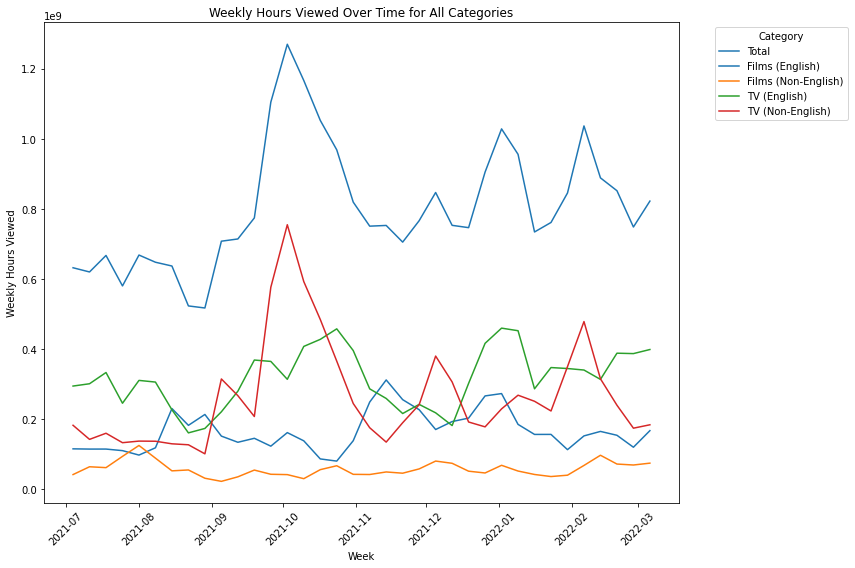

In [103]:
# Convert date format
df_NFLXTop10['date_added'] = pd.to_datetime(df_NFLXTop10['date_added'])
df_NFLXTop10['week'] = pd.to_datetime(df_NFLXTop10['week'])

# Group by week and category
agg_df = df_NFLXTop10.groupby(['week', 'category'])['weekly_hours_viewed'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
# Plot aggregate data 
sns.lineplot(data=agg_df, x='week', y='weekly_hours_viewed', estimator='sum', errorbar=None, label='Total')
# Plot each category
sns.lineplot(data=agg_df, x='week', y='weekly_hours_viewed', hue='category', errorbar=None)
# Plot settings
plt.title('Weekly Hours Viewed Over Time for All Categories')
plt.xlabel('Week')
plt.ylabel('Weekly Hours Viewed')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
